# Radar & Pizza Plots

A radar plot or a pizza plot are ways of visualizing data in a circular manner. 

You'll see them commonly used when comparing different metrics of a player or team.

It's really common to use them to compare percentiles of a player in different metrics or compare two players against each other.

In [76]:
# CREDIT TO JOHN MCKAY (twitter: @mckayjohns) for template code.

In [77]:
# Lets get our data from fbref
import pandas as pd

url = 'https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats'

df = pd.read_html(url, attrs={'id': 'stats_standard'})[0]

In [78]:
df.head(10)

Unnamed: 0_level_0   Unnamed: 1_level_0 Unnamed: 2_level_0  \
                  Rk               Player             Nation   
0                  1       James Abankwah             ie IRL   
1                  2    Keyliane Abdallah             fr FRA   
2                  3     Yunis Abdelhamid             ma MAR   
3                  4        Himad Abdelli             dz ALG   
4                  5  Mohamed Abdelmoneim             eg EGY   
5                  6             Ali Abdi             tn TUN   
6                  7                 Abel             es ESP   
7                  8        Nabil Aberdin             fr FRA   
8                  9    Oliver Abildgaard             dk DEN   
9                 10       Matthis Abline             fr FRA   

  Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0  \
                 Pos              Squad               Comp                Age   
0                 DF            Udinese         it Serie A             20-272   
1                 FW          Marseille         fr Ligue 1             18-192   
2                 DF      Saint-Étienne         fr Ligue 1             37-016   
3              MF,FW             Angers         fr Ligue 1             24-332   
4                 DF               Nice         fr Ligue 1             25-256   
5              DF,MF               Nice         fr Ligue 1             30-299   
6                 DF            Osasuna         es La Liga             24-054   
7                 MF             Getafe         es La Liga             22-052   
8                 MF               Como         it Serie A             28-126   
9                 FW             Nantes         fr Ligue 1             21-200   

  Unnamed: 7_level_0 Playing Time         ... Per 90 Minutes              \
                Born           MP Starts  ...            Ast   G+A  G-PK   
0               2004            1      0  ...           0.00  0.00  0.00   
1               2006            1      0  ...           0.00  0.00  0.00   
2               1987            5      5  ...           0.00  0.00  0.00   
3               1999            7      7  ...           0.00  0.29  0.00   
4               1999            3      2  ...           0.00  0.00  0.00   
5               1993            4      2  ...           0.00  0.41  0.41   
6               2000            8      7  ...           0.00  0.29  0.29   
7               2002            5      3  ...           0.00  0.00  0.00   
8               1996            1      0  ...           0.00  0.00  0.00   
9               2003            7      7  ...           0.00  0.16  0.16   

                                           Unnamed: 37_level_0  
  G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG             Matches  
0   0.00  0.00  0.00   0.00  0.00     0.00             Matches  
1   0.00  0.00  0.00   0.00  0.00     0.00             Matches  
2   0.00  0.05  0.01   0.05  0.05     0.05             Matches  
3   0.00  0.27  0.15   0.42  0.04     0.19             Matches  
4   0.00  0.00  0.00   0.00  0.00     0.00             Matches  
5   0.41  0.22  0.22   0.44  0.22     0.44             Matches  
6   0.29  0.03  0.04   0.08  0.03     0.08             Matches  
7   0.00  0.02  0.01   0.03  0.02     0.03             Matches  
8   0.00  0.00  0.00   0.00  0.00     0.00             Matches  
9   0.16  0.22  0.10   0.32  0.22     0.32             Matches  

[10 rows x 38 columns]

In [79]:
# You might notice that the column names are a bit weird, let's fix that

# We'll get rid of the per 90 columns and we will recalculate the ones we are interested in
df = df[df.columns.drop(list(df.filter(regex='Per 90')))]


In [80]:
df.head(10)

Unnamed: 0_level_0   Unnamed: 1_level_0 Unnamed: 2_level_0  \
                  Rk               Player             Nation   
0                  1       James Abankwah             ie IRL   
1                  2    Keyliane Abdallah             fr FRA   
2                  3     Yunis Abdelhamid             ma MAR   
3                  4        Himad Abdelli             dz ALG   
4                  5  Mohamed Abdelmoneim             eg EGY   
5                  6             Ali Abdi             tn TUN   
6                  7                 Abel             es ESP   
7                  8        Nabil Aberdin             fr FRA   
8                  9    Oliver Abildgaard             dk DEN   
9                 10       Matthis Abline             fr FRA   

  Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0  \
                 Pos              Squad               Comp                Age   
0                 DF            Udinese         it Serie A             20-272   
1                 FW          Marseille         fr Ligue 1             18-192   
2                 DF      Saint-Étienne         fr Ligue 1             37-016   
3              MF,FW             Angers         fr Ligue 1             24-332   
4                 DF               Nice         fr Ligue 1             25-256   
5              DF,MF               Nice         fr Ligue 1             30-299   
6                 DF            Osasuna         es La Liga             24-054   
7                 MF             Getafe         es La Liga             22-052   
8                 MF               Como         it Serie A             28-126   
9                 FW             Nantes         fr Ligue 1             21-200   

  Unnamed: 7_level_0 Playing Time         ... Performance      Expected       \
                Born           MP Starts  ...        CrdY CrdR       xG npxG   
0               2004            1      0  ...           0    0      0.0  0.0   
1               2006            1      0  ...           0    0      0.0  0.0   
2               1987            5      5  ...           0    0      0.2  0.2   
3               1999            7      7  ...           0    0      1.9  0.3   
4               1999            3      2  ...           1    0      0.0  0.0   
5               1993            4      2  ...           1    0      0.5  0.5   
6               2000            8      7  ...           1    0      0.2  0.2   
7               2002            5      3  ...           0    0      0.0  0.0   
8               1996            1      0  ...           0    0      0.0  0.0   
9               2003            7      7  ...           1    0      1.3  1.3   

                Progression           Unnamed: 37_level_0  
   xAG npxG+xAG        PrgC PrgP PrgR             Matches  
0  0.0      0.0           0    0    0             Matches  
1  0.0      0.0           1    0    0             Matches  
2  0.0      0.3           2   10    3             Matches  
3  1.0      1.3          28   47   32             Matches  
4  0.0      0.0           1    6    0             Matches  
5  0.5      1.1           3    4   13             Matches  
6  0.3      0.5          13   29   14             Matches  
7  0.0      0.1           2    6    2             Matches  
8  0.0      0.0           0    0    0             Matches  
9  0.6      2.0          16   17   43             Matches  

[10 rows x 28 columns]

In [81]:
# This will get rid of the first level of the multiindex on the columns
df = df.droplevel(0, axis=1)

In [82]:
df.head(10)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Matches
0,1,James Abankwah,ie IRL,DF,Udinese,it Serie A,20-272,2004,1,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,Matches
1,2,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18-192,2006,1,0,...,0,0,0.0,0.0,0.0,0.0,1,0,0,Matches
2,3,Yunis Abdelhamid,ma MAR,DF,Saint-Étienne,fr Ligue 1,37-016,1987,5,5,...,0,0,0.2,0.2,0.0,0.3,2,10,3,Matches
3,4,Himad Abdelli,dz ALG,"MF,FW",Angers,fr Ligue 1,24-332,1999,7,7,...,0,0,1.9,0.3,1.0,1.3,28,47,32,Matches
4,5,Mohamed Abdelmoneim,eg EGY,DF,Nice,fr Ligue 1,25-256,1999,3,2,...,1,0,0.0,0.0,0.0,0.0,1,6,0,Matches
5,6,Ali Abdi,tn TUN,"DF,MF",Nice,fr Ligue 1,30-299,1993,4,2,...,1,0,0.5,0.5,0.5,1.1,3,4,13,Matches
6,7,Abel,es ESP,DF,Osasuna,es La Liga,24-054,2000,8,7,...,1,0,0.2,0.2,0.3,0.5,13,29,14,Matches
7,8,Nabil Aberdin,fr FRA,MF,Getafe,es La Liga,22-052,2002,5,3,...,0,0,0.0,0.0,0.0,0.1,2,6,2,Matches
8,9,Oliver Abildgaard,dk DEN,MF,Como,it Serie A,28-126,1996,1,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,Matches
9,10,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,21-200,2003,7,7,...,1,0,1.3,1.3,0.6,2.0,16,17,43,Matches


In [84]:
# We Are only going to be looking at FWs so we will filter the data to only include those players
# As well we only want to be looking at player who have played more than 1000 minutes

# The reason we are only looking at FWs is because we want to compare players who play in similar positions
# The reason we are only looking at players who have played more than 1000 minutes is because we want to compare players who have played a significant amount of time and we don't want to inflate stats of players by comparing them to players who have played very little
df = df[df['Pos'].str.contains('FW')]
df = df[df['Min'].astype(int) > 400]
df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Matches
3,4,Himad Abdelli,dz ALG,"MF,FW",Angers,fr Ligue 1,24-332,1999,7,7,...,0,0,1.9,0.3,1.0,1.3,28,47,32,Matches
9,10,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,21-200,2003,7,7,...,1,0,1.3,1.3,0.6,2.0,16,17,43,Matches
11,12,Zakaria Aboukhlal,ma MAR,"MF,FW",Toulouse,fr Ligue 1,24-239,2000,7,6,...,0,0,3.3,2.5,0.1,2.6,8,6,39,Matches
17,18,Akor Adams,ng NGA,FW,Montpellier,fr Ligue 1,24-259,2000,7,6,...,2,0,2.9,2.9,0.6,3.4,4,3,25,Matches
19,20,Junior Adamu,at AUT,FW,Freiburg,de Bundesliga,23-130,2001,6,6,...,2,0,2.2,2.2,1.4,3.6,4,3,23,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,2145,Mattia Zaccagni,it ITA,"FW,MF",Lazio,it Serie A,29-120,1995,7,7,...,2,0,2.2,1.4,1.0,2.4,17,30,44,Matches
2242,2157,Duván Zapata,co COL,FW,Torino,it Serie A,33-196,1991,7,7,...,1,0,3.4,3.4,0.5,3.9,6,7,36,Matches
2245,2160,Bryan Zaragoza,es ESP,"FW,MF",Osasuna,es La Liga,23-172,2001,9,7,...,2,0,1.4,1.4,0.5,1.8,24,12,45,Matches
2254,2169,Edon Zhegrova,xk KVX,"FW,MF",Lille,fr Ligue 1,25-197,1999,5,5,...,0,0,1.0,1.0,1.9,2.9,22,28,42,Matches


In [85]:
# Now let's calculate the percentiles for each player in the columns we're interested in
# We can calculate the percentiles using the .rank() method

# Let's look at the columns we are interested in
df[['90s', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG',]].head(10)

# let's also make sure that the columns are of the correct type
df[['90s', 'xG', 'xAG', 'npxG', 'npxG+xAG', 'PrgP']] = df[['90s', 'xG', 'xAG', 'npxG', 'npxG+xAG', 'PrgP']].astype(float)
df[['Gls', 'Ast', 'G+A']] = df[['Gls', 'Ast', 'G+A']].astype(int)

In [86]:
# Now let's calculate the per 90 stats for each of these columns
# But we will name them as we want to see them in the radar plot
df['goals_per_90'] = df['Gls'] / df['90s']
df['assists_per_90'] = df['Ast'] / df['90s']
df['goals_assists_per_90'] = df['G+A'] / df['90s']
df['expected_goals_per_90'] = df['xG'] / df['90s']
df['expected_assists_per_90'] = df['xAG'] / df['90s']
df['np_expected_goals_per_90'] = df['npxG'] / df['90s']
df['progressive_passes_per_90'] = df['PrgP'] / df['90s']
df['np_expected_goals_and_assists_per_90'] = df['npxG+xAG'] / df['90s']

In [87]:
# Assuming 'df' is your DataFrame

# List of column names to process
columns = [
    'goals_per_90', 'assists_per_90', 'goals_assists_per_90', 
    'expected_goals_per_90', 'expected_assists_per_90', 
    'np_expected_goals_per_90', 'progressive_passes_per_90', 
    'np_expected_goals_and_assists_per_90'
]

# New names for the percentile columns
new_column_names = [
    'G', 'A', 'G+A', 
    'xG', 'xA', 
    'npxG', 'PrgP', 
    'npxG+xAG'
]

# Calculate percentiles, handle NaNs, and convert to integers
for original, new_name in zip(columns, new_column_names):
    df[new_name] = df[original].rank(pct=True)  # Rank as percentile
    median_rank = df[new_name].median()         # Compute median rank to replace NaNs
    df[new_name].fillna(median_rank, inplace=True)  # Replace NaNs with median rank
    df[new_name] = (df[new_name] * 100).astype(int)  # Scale to 100 and convert to integer

# Your DataFrame 'df' now has the new columns with integer percentiles


/var/folders/tn/2spq72m9385bz56_ft5yg5s80000gn/T/ipykernel_14825/308422748.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[new_name].fillna(median_rank, inplace=True)  # Replace NaNs with median rank
/var/folders/tn/2spq72m9385bz56_ft5yg5s80000gn/T/ipykernel_14825/308422748.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

### Now that we have our data, lets start by plotting a radar plot for a single player

In [88]:
from mplsoccer import Radar

In [89]:
player1 = df[df['Player'] == 'Cole Palmer']
player1

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,assists_per_90,goals_assists_per_90,expected_goals_per_90,expected_assists_per_90,np_expected_goals_per_90,progressive_passes_per_90,np_expected_goals_and_assists_per_90,G,A,xA
1608,1548,Cole Palmer,eng ENG,"MF,FW",Chelsea,eng Premier League,22-161,2002,7,7,...,0.757576,1.666667,0.666667,0.575758,0.545455,7.121212,1.106061,96,98,99


In [90]:
columns_to_plot = [
    'G', 'A', 'G+A', 
    'xG', 'xA', 
    'npxG', 'PrgP', 
    'npxG+xAG'
]

# If there was a stat that meant having a lower value was better we can use the parameter
# lower_is_better to make the radar plot reflect that
# example: lower_is_better=['Goals Conceded']
# And then add that parameter to the Radar object

radar = Radar(
    # These are the columns we want to plot
    params=columns_to_plot,
    min_range=[0 for _ in columns_to_plot],# Since we are plotting percentiles the minimum value is 0
    max_range=[100 for _ in columns_to_plot], # The maximum value is the maximum percentile
    # lower_is_better=lower_is_better
)

Text(0, 0.05, 'Metrics show per 90 percentile stats\n\nComparing against all forwards\nwith at least 400 minutes played ')

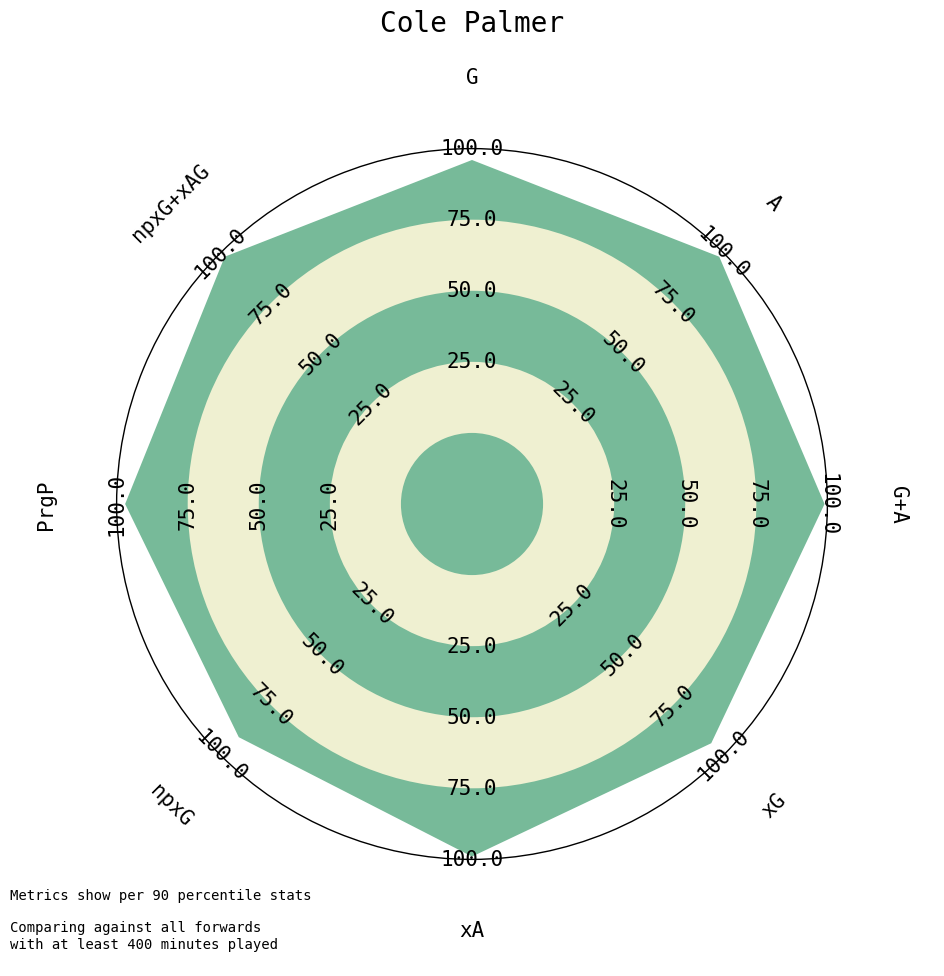

In [92]:
fig, ax = radar.setup_axis()

rings_inner = radar.draw_circles(
    ax=ax, facecolor='white', edgecolor='black', lw=1, zorder=1
)

radar_output = radar.draw_radar(
    ax=ax,
    values=player1[columns_to_plot].values.flatten().tolist(),
    kwargs_radar={'facecolor': '#77BA99'},
    kwargs_rings={'facecolor': '#EFF0D1'}
)

range_labels = radar.draw_range_labels(
    ax=ax, fontsize=15,
   fontproperties="monospace"
)
# draw the range labels
param_labels = radar.draw_param_labels(
    ax=ax, fontsize=15,
    fontproperties="monospace"
)

# Let's add some text to the plot
ax.text(
    x=0.5, y=1.02, s='Cole Palmer', fontsize=20,
    ha='center', va='center', transform=ax.transAxes,
    fontfamily='monospace'
)

# Lets add some text to the lower left corner
ax.text(
    x=0, y=0.05, s='Metrics show per 90 percentile stats\n\nComparing against all forwards\nwith at least 400 minutes played ', fontsize=10,
    ha='left', va='center', transform=ax.transAxes, fontfamily='monospace'
)

In [93]:
# Now let's compare two players
player2 = df[df['Player'] == 'Bukayo Saka']
player2

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,assists_per_90,goals_assists_per_90,expected_goals_per_90,expected_assists_per_90,np_expected_goals_per_90,progressive_passes_per_90,np_expected_goals_and_assists_per_90,G,A,xA
1826,1757,Bukayo Saka,eng ENG,"MF,FW",Arsenal,eng Premier League,23-039,2001,7,7,...,1.111111,1.428571,0.31746,0.555556,0.31746,4.761905,0.888889,55,100,98


Text(0, 0.05, 'Metrics show per 90 percentile stats\n\nComparing against all forwards\nwith at least 1000 minutes played\n@mckayjohns')

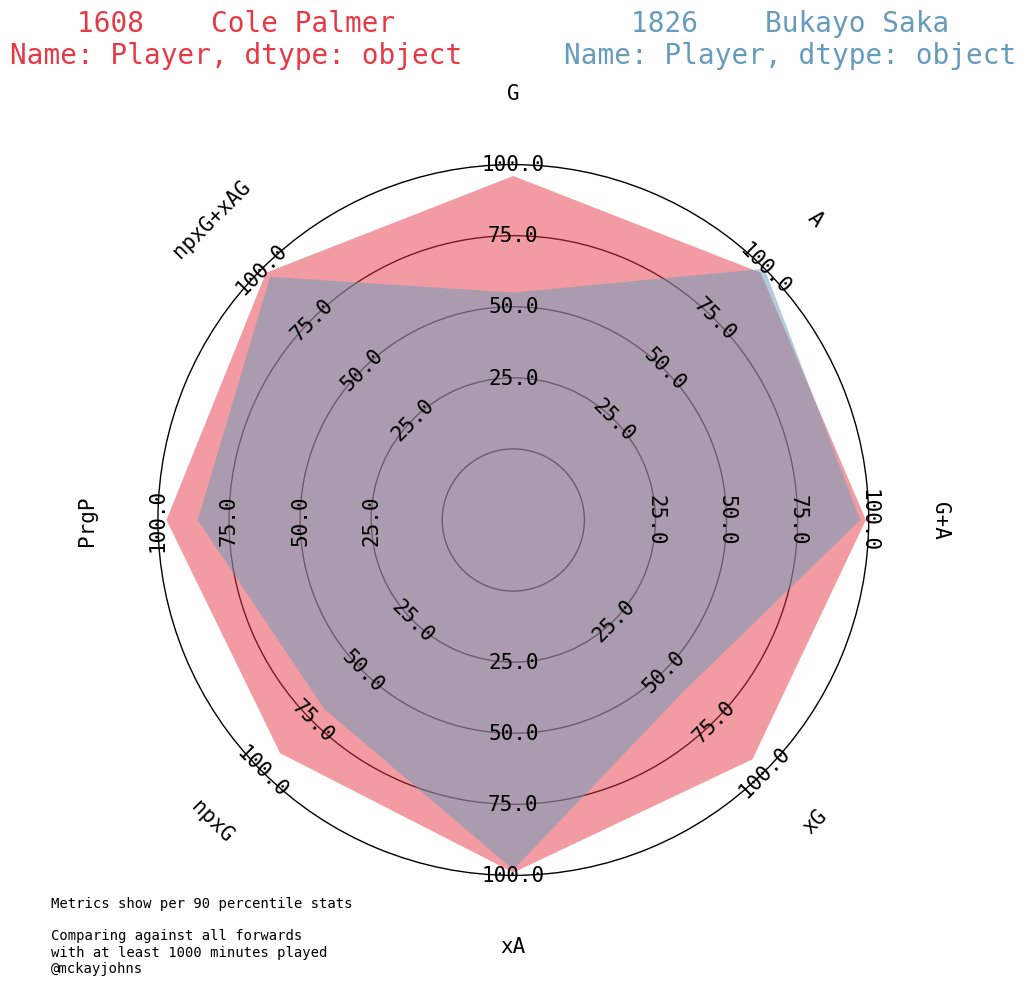

In [94]:
fig, ax = radar.setup_axis()

rings_inner = radar.draw_circles(
    ax=ax, facecolor='white', edgecolor='black', lw=1, zorder=1
)

radar_output = radar.draw_radar_compare(
    ax=ax,
    values=player1[columns_to_plot].values.flatten().tolist(),
    compare_values=player2[columns_to_plot].values.flatten().tolist(),
    kwargs_radar={'facecolor': '#e63946', 'alpha': 0.5},
    kwargs_compare={'facecolor': '#669bbc', 'alpha': 0.5}
)

range_labels = radar.draw_range_labels(
    ax=ax, fontsize=15,
   fontproperties="monospace"
)

param_labels = radar.draw_param_labels(
    ax=ax, fontsize=15,
    fontproperties="monospace"
)

# Let's add some text to the plot
ax.text(
    x=0.2, y=1.02, s=player1['Player'], fontsize=20,
    ha='center', va='center', transform=ax.transAxes,
    fontfamily='monospace', color='#e63946'
)

ax.text(
    x=0.8, y=1.02, s=player2['Player'], fontsize=20,
    ha='center', va='center', transform=ax.transAxes,
    fontfamily='monospace', color='#669bbc'
)

# Lets add some text to the lower left corner
ax.text(
    x=0, y=0.05, s='Metrics show per 90 percentile stats\n\nComparing against all forwards\nwith at least 1000 minutes played\n@mckayjohns', fontsize=10,
    ha='left', va='center', transform=ax.transAxes, fontfamily='monospace'
)

### There is a ton of customization that can be done with these plots and it would be impossible to cover all of it in this notebook.

You can check out the documentation here: https://mplsoccer.readthedocs.io/en/latest/

In [95]:
# save the radar plot
#fig.savefig('/Users/mckayjohns/Desktop/pizza_plot.png', dpi=300, bbox_inches='tight')

In [96]:
from mplsoccer import PyPizza

In [97]:
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#EFF0D1',
    straight_line_color='#000000',
    straight_line_lw=1,
    last_circle_lw=1,
    other_circle_lw=0,
    other_circle_color='#000000',
    other_circle_ls='--'
)

Text(0.075, 0.005, 'data: statsbomb viz fbref\n@mckayjohns')

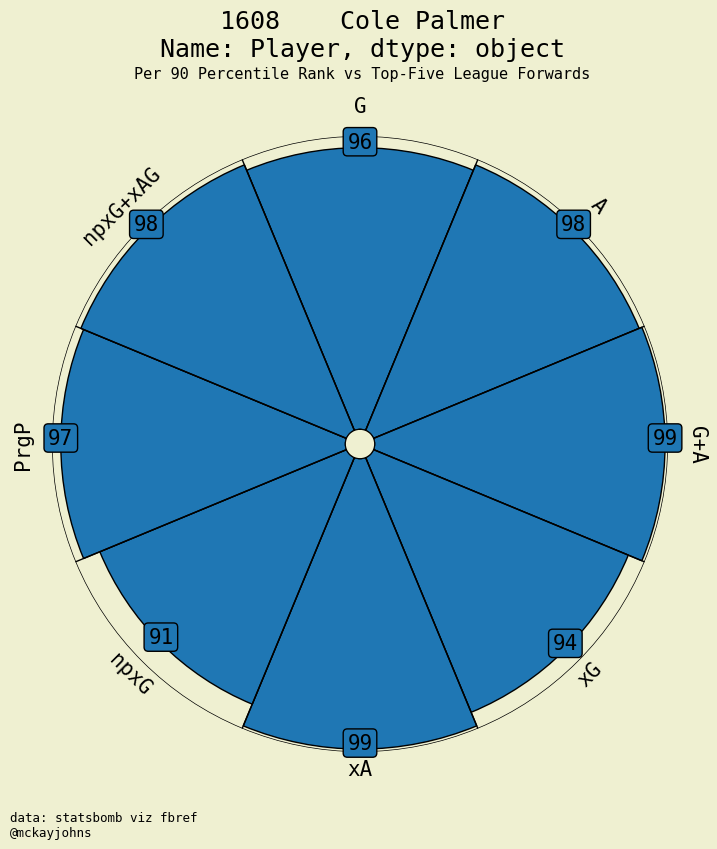

In [98]:
fig, ax = pizza.make_pizza(
    figsize=(8, 8),
    values=player1[columns_to_plot].values.flatten().tolist(),
    kwargs_slices=dict(
        facecolor='tab:blue', edgecolor='#000000', linewidth=1
    ),
    kwargs_params=dict(
        color='#000000', fontsize=15, fontproperties="monospace"
    ),
    kwargs_values=dict(
        color='#000000', fontsize=15, fontproperties="monospace", 
        bbox = {
            "edgecolor": "#000000",
            "facecolor": "tab:blue",
            "boxstyle": "round,pad=0.2",
            "lw": 1
        }
    )
)

# add title
fig.text(
    0.515, 0.98, player1['Player'], size=18,
    ha="center", fontfamily="monospace", color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.952,
    "Per 90 Percentile Rank vs Top-Five League Forwards",
    size=11,
    ha="center", fontfamily="monospace", color="#000000"
)

CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "@mckayjohns"

fig.text(
    0.075, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontfamily="monospace", color="#000000",
    ha="left"
)